# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [19]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

Nos códigos abaixo, o objetivo foi preparar a base de dados **housing.csv** para ser utilizada em modelos do scikit-learn. Primeiro, o arquivo é lido e são verificadas as informações sobre tipos de dados e valores ausentes. Em seguida, as variáveis numéricas e categóricas são separadas: os valores faltantes nas numéricas são substituídos pela mediana (usando SimpleImputer), e as categóricas são transformadas em variáveis binárias (one-hot encoding) para que o modelo possa interpretá-las corretamente. Por fim, o código define a variável alvo y (median_house_value) e as variáveis explicativas X, que serão usadas para treinar o modelo, confirmando que ambas possuem o mesmo número de observações.

In [20]:
# Lê o arquivo CSV
housing = pd.read_csv("housing.csv")

# Mostra as 5 primeiras linhas
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:
# Verifica o tipo de cada coluna
print(housing.info())

# Verifica se há valores ausentes
print(housing.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proxim

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Separa variáveis numéricas e categóricas
num_cols = housing.select_dtypes(include=["int64", "float64"]).columns
cat_cols = housing.select_dtypes(include=["object"]).columns

# Imputação para valores numéricos (substitui NaN pela mediana)
imputer = SimpleImputer(strategy="median")
housing[num_cols] = imputer.fit_transform(housing[num_cols])

# Codificação one-hot para variáveis categóricas
housing = pd.get_dummies(housing, columns=cat_cols, drop_first=True)

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [23]:
# Define o target (variável dependente)
y = housing["median_house_value"]

# Define as features (variáveis independentes)
X = housing.drop("median_house_value", axis=1)

In [24]:
print(X.shape, y.shape)

(20640, 12) (20640,)


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

Agora, realizo uma análise de correlação entre as variáveis numéricas do conjunto de dados. Primeiro, é calculada a matriz de correlação para identificar o grau de relação linear entre cada par de variáveis. Em seguida, são exibidos os valores de correlação da variável-alvo median_house_value com as demais, em ordem decrescente — o que ajuda a identificar quais variáveis têm maior potencial preditivo. Por fim, é gerado um mapa de calor (heatmap) com o seaborn, permitindo visualizar de forma gráfica essas relações, onde cores mais fortes indicam correlações mais intensas, positivas ou negativas.

In [25]:
# Calcula a matriz de correlação
corr_matrix = housing.corr(numeric_only=True)

# Mostra as correlações com a variável alvo (ordenadas)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049457
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

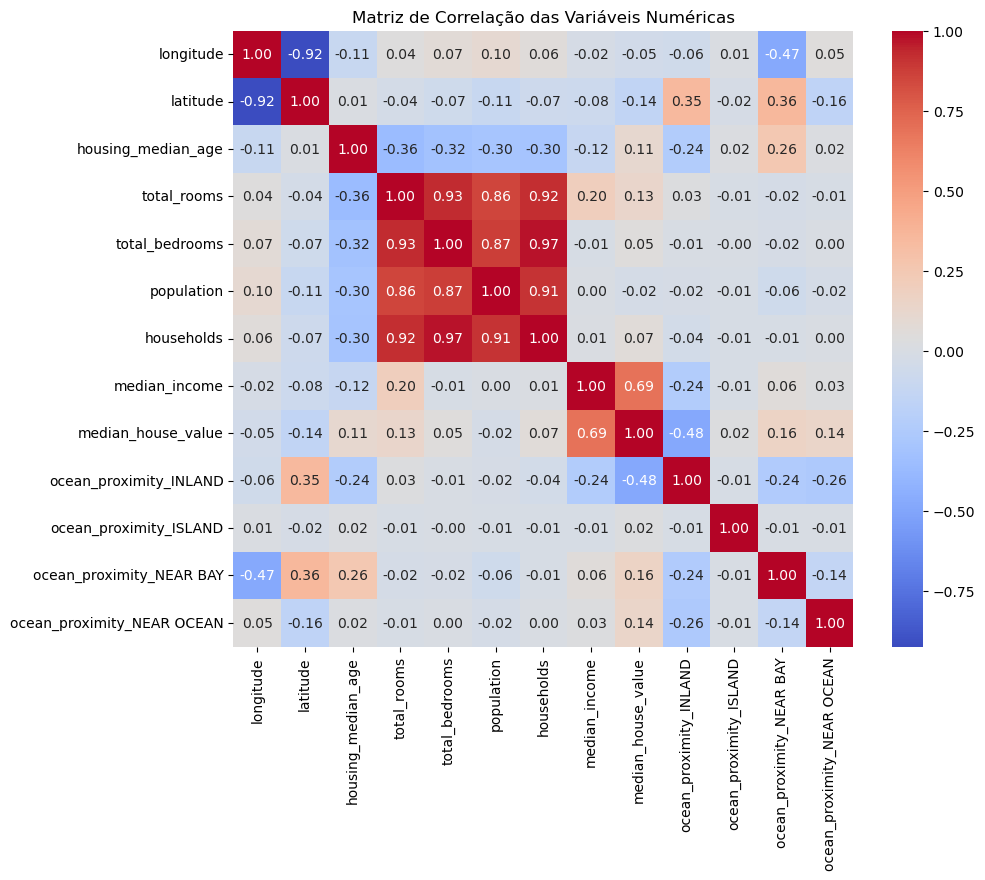

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()

### 3. Separe os dados em validação e teste

Neste trecho de código, os dados foram divididos em conjuntos de treinamento e teste utilizando a função train_test_split do scikit-learn. O parâmetro test_size=0.2 indica que 20% dos dados foram reservados para teste, enquanto 80% serão usados para treinar o modelo. A opção random_state=42 garante que essa divisão seja reproduzível, mantendo os mesmos resultados em futuras execuções. Por fim, o comando print confirma as dimensões dos conjuntos, mostrando que há 16.512 observações para treino e 4.128 para teste, cada uma com 12 variáveis independentes.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 12) (4128, 12) (16512,) (4128,)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

Aqui foram **treinadas duas árvores de decisão** para prever o valor mediano das casas (median_house_value), variando apenas a **profundidade máxima** dos modelos. A primeira árvore tem profundidade 8, permitindo capturar relações mais complexas nos dados, enquanto a segunda tem profundidade 2, representando um modelo mais simples e generalista. Após o treinamento com o conjunto de dados de treino, foram feitas previsões no conjunto de validação e calculado o **RMSE (Root Mean Squared Error)** — uma métrica que mede o erro médio entre os valores previstos e os reais. O resultado mostrou que a árvore mais profunda (RMSE ≈ 65.070) teve melhor desempenho que a mais rasa (RMSE ≈ 83.169), indicando maior capacidade preditiva.

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [32]:
X_train_full, X_valid, y_train_full, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

In [33]:
# Árvore 1: profundidade máxima = 8
tree_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_8.fit(X_train_full, y_train_full)

# Árvore 2: profundidade máxima = 2
tree_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_2.fit(X_train_full, y_train_full)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [34]:
# Previsões
pred_8 = tree_8.predict(X_valid)
pred_2 = tree_2.predict(X_valid)

# Cálculo do RMSE
rmse_8 = np.sqrt(mean_squared_error(y_valid, pred_8))
rmse_2 = np.sqrt(mean_squared_error(y_valid, pred_2))

print(f"Árvore (max_depth=8) - RMSE: {rmse_8:.2f}")
print(f"Árvore (max_depth=2) - RMSE: {rmse_2:.2f}")

Árvore (max_depth=8) - RMSE: 65070.20
Árvore (max_depth=2) - RMSE: 83168.53


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

Neste trecho, foi calculado o **Erro Quadrático Médio (MSE)** para as duas árvores de decisão — tanto na base de **treinamento** quanto na de **teste** — com o objetivo de avaliar o desempenho e a capacidade de generalização dos modelos. O MSE mede o quão distantes estão as previsões dos valores reais, sendo valores menores indicativos de melhor ajuste. A árvore com profundidade **máxima = 8** apresentou MSEs menores (≈ 3,10×10⁹ no treino e ≈ 4,23×10⁹ no teste), mostrando bom desempenho e maior precisão. Já a árvore com **profundidade = 2** teve MSEs mais altos (≈ 6,65×10⁹ e ≈ 6,92×10⁹), indicando um modelo mais simples e subajustado. Esses resultados sugerem que a árvore mais profunda captura melhor as relações entre as variáveis, ainda mantendo um bom equilíbrio entre ajuste e generalização.

In [35]:
from sklearn.metrics import mean_squared_error

# MSE para o modelo com profundidade = 8
mse_train_8 = mean_squared_error(y_train_full, tree_8.predict(X_train_full))
mse_test_8 = mean_squared_error(y_valid, tree_8.predict(X_valid))

# MSE para o modelo com profundidade = 2
mse_train_2 = mean_squared_error(y_train_full, tree_2.predict(X_train_full))
mse_test_2 = mean_squared_error(y_valid, tree_2.predict(X_valid))

# Exibe os resultados
print("Árvore (max_depth=8):")
print(f"  MSE Treino: {mse_train_8:.2f}")
print(f"  MSE Teste : {mse_test_8:.2f}\n")

print("Árvore (max_depth=2):")
print(f"  MSE Treino: {mse_train_2:.2f}")
print(f"  MSE Teste : {mse_test_2:.2f}")

Árvore (max_depth=8):
  MSE Treino: 3104583522.48
  MSE Teste : 4234131176.92

Árvore (max_depth=2):
  MSE Treino: 6651703412.70
  MSE Teste : 6917005141.73


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Com base nos resultados obtidos, a árvore com profundidade máxima igual a 8 se mostra mais adequada, pois apresentou menor erro médio quadrático (MSE) tanto na base de treinamento (≈ 3,10×10⁹) quanto na base de teste (≈ 4,23×10⁹), indicando melhor capacidade de ajuste e desempenho preditivo. Embora exista um leve aumento do erro no conjunto de teste — sinal de possível overfitting —, esse comportamento é esperado em modelos mais complexos. Já a árvore com profundidade 2 apresentou erros mais altos e semelhantes entre treino e teste, caracterizando um subajuste. Assim, a árvore de profundidade 8 oferece o melhor equilíbrio entre desempenho e complexidade para este problema.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

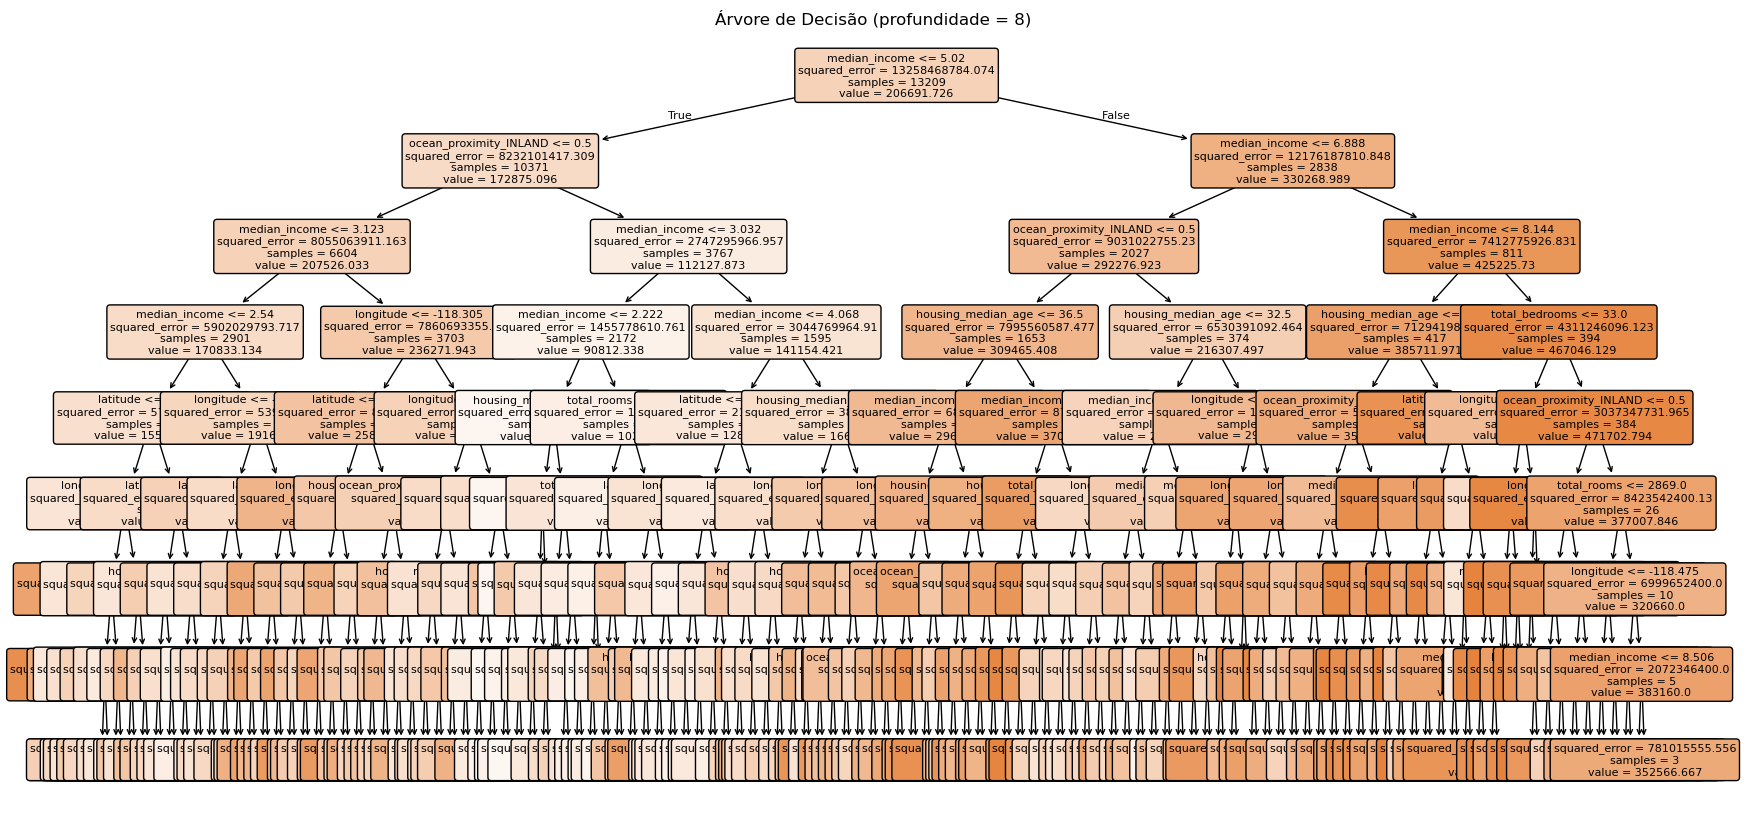

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    tree_8,                # usa o modelo com profundidade máxima = 8
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Árvore de Decisão (profundidade = 8)")
plt.show()

Ao observar a árvore de decisão com profundidade máxima igual a 8, é possível perceber que a variável median_income (renda mediana) aparece logo nos primeiros níveis da árvore, inclusive como um dos principais critérios de divisão. Isso indica que ela é a variável mais importante para explicar a variação do valor mediano das casas (median_house_value). Essa importância faz sentido, pois regiões com maior renda tendem a ter imóveis mais valorizados.